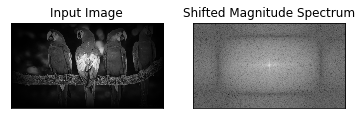

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Read/grayscale the image and get optimal row, col for dft2 -> [2^n]
img_gray = cv2.GaussianBlur(cv2.imread('ryrodlriynn21.jpg',0), (3,3), cv2.BORDER_DEFAULT)
rows,cols = img_gray.shape

#Create Hanning widow function to reduce border effects
h = np.hanning(rows)
w = np.hanning(cols)
hann2d = np.sqrt(np.outer(h,w))

img_hann = img_gray * hann2d
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

# FFT
f = np.fft.fft2(img_hann,[nrows,ncols])
magnitude_spectrum = 20*np.log(np.abs(f))

# Display the results, shift spectrum so low frequencies are at 0,0
fshift = np.fft.fftshift(f)
display_magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img_hann, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(display_magnitude_spectrum, cmap = 'gray')
plt.title('Shifted Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


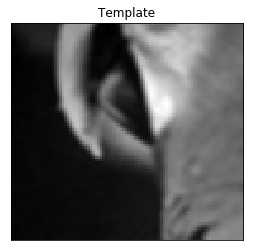

In [2]:
# Extract the template
fromCenter = False
r = cv2.selectROI('Select ROI', img_gray, fromCenter, False)
template = img_hann[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
plt.imshow(template, cmap='gray')
plt.title('Template'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# Rectangle offset
tx,ty = template.shape

# Compute the cross power spectrum
Ga = np.fft.fft2(img_hann,[nrows,ncols])
Gb = np.fft.fft2(template,[nrows,ncols])
CPS = np.abs(np.fft.ifft2((Ga*np.conj(Gb))/np.abs(Ga*np.conj(Gb))))

# find peak correlation   
max_corr_ind = np.unravel_index(np.argmax(CPS, axis=None), CPS.shape)
# display best match
ul_point = (max_corr_ind[1], max_corr_ind[0])
lr_point = (max_corr_ind[1]+ty, max_corr_ind[0]+tx)
match = cv2.rectangle(img_hann, ul_point, lr_point, (255,255,255), 3) 


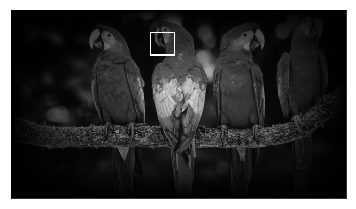

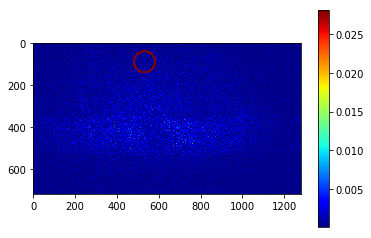

In [6]:
plt.imshow(match, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

CPS = cv2.circle(CPS, (max_corr_ind[1],max_corr_ind[0]), 50, (np.max(CPS),0,0), 10)
plt.imshow(CPS, cmap='jet')
plt.colorbar()

In [9]:
import cv2
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib qt
start = time.time()

img_gray = cv2.GaussianBlur(cv2.imread('text_img.jpg',0), (3,3), cv2.BORDER_DEFAULT)
rows,cols = img_gray.shape

h = np.hanning(rows)
w = np.hanning(cols)
hann2d = np.sqrt(np.outer(h,w))

img_hann = img_gray * hann2d
nrows = cv2.getOptimalDFTSize(rows)
ncols = cv2.getOptimalDFTSize(cols)

fromCenter = False
r = cv2.selectROI('Select ROI', img_gray, fromCenter, False)
template = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
cv2.destroyAllWindows()
tx,ty = template.shape

start = time.time()
Ga = np.fft.fft2(img_hann,[nrows,ncols])
Gb = np.fft.fft2(template,[nrows,ncols])
CPS = np.abs(np.fft.ifft2((Ga*np.conj(Gb))/np.abs(Ga*np.conj(Gb))))
 
max_corr_ind = np.unravel_index(np.argmax(CPS, axis=None), CPS.shape)
end = time.time()
print(end - start)

ul_point = (max_corr_ind[1], max_corr_ind[0])
lr_point = (max_corr_ind[1]+ty, max_corr_ind[0]+tx)
match = cv2.rectangle(img_gray, ul_point, lr_point, (255,255,255), 3)
fig = plt.figure()
plt.imshow(match, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

0.5726521015167236


In [ ]:
#TO:DO Use larger Hanning window and cutoff smaller part of the image 